# Continuous random variables

This notebook contains all the figure generation code for [Section 2.4 Continuous random variables]() in the **No Bullshit Guide to Statistics**.

#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn"t work
from plot_helpers import RCPARAMS
# RCPARAMS.update({"figure.figsize": (7, 4)})
RCPARAMS.update({"figure.figsize": (4.5, 1.5)})
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = "retina"

# Where to store figures
DESTDIR = "figures/prob/continuous"  # where to save figures

from ministats.utils import savefigure

<Figure size 640x480 with 0 Axes>

In [3]:
from ministats import plot_pdf_and_cdf

In [4]:
# set random seed for repeatability
np.random.seed(3)

## Definitions

## Calculus prerequisites

### Functions

In [5]:
# define the function g that takes input x
def g(x):
    return 0.5 * x

Saved figure to figures/prob/continuous/calculus_lineplot_gx.pdf
Saved figure to figures/prob/continuous/calculus_lineplot_gx.png


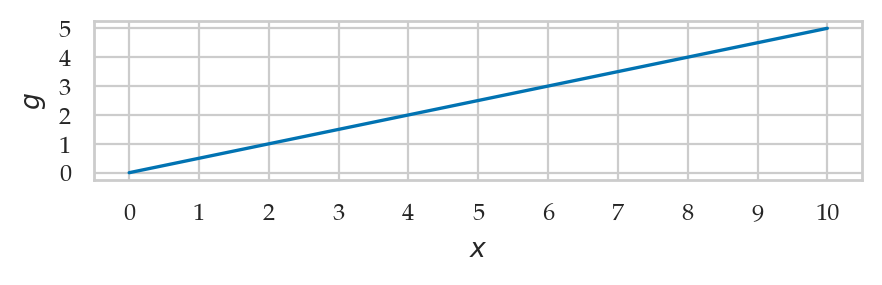

In [6]:
xs = np.linspace(0, 10, 1000)
gs = g(xs)

ax = sns.lineplot(x=xs, y=gs)
ax.set_xticks(range(0,11))
ax.set_yticks(range(0,6))
ax.set_xlabel("$x$")
ax.set_ylabel("$g$");


filename = os.path.join(DESTDIR, "calculus_lineplot_gx.pdf")
savefigure(ax, filename)

### Integrals

Saved figure to figures/prob/continuous/calculus_integral_under_gx_a_to_b.pdf
Saved figure to figures/prob/continuous/calculus_integral_under_gx_a_to_b.png


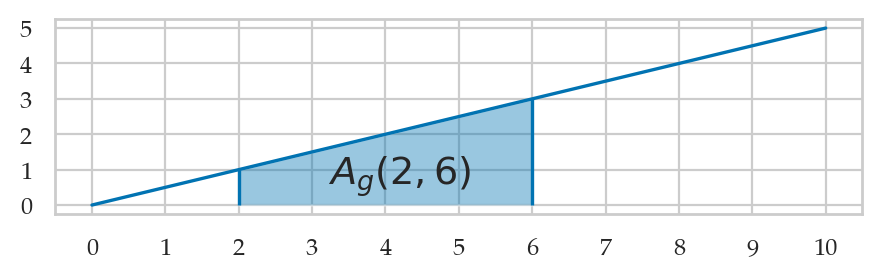

In [7]:
ax = sns.lineplot(x=xs, y=gs)

# limits of integration
a = 2
b = 6

# highlight the area under g(x) between x=a and x=b
mask = (xs > a) & (xs < b)
ax.fill_between(xs[mask], y1=gs[mask], alpha=0.4)
ax.set_xticks(range(0,11))
ax.set_yticks(range(0,6))
ax.vlines([a], ymin=0, ymax=g(a))
ax.vlines([b], ymin=0, ymax=g(b))
ax.text((a+b)/2+0.2, 0.6*g(a), "$A_g(2,6)$", ha="center", fontsize="x-large")

# FIGURES ONLY
filename = os.path.join(DESTDIR, "calculus_integral_under_gx_a_to_b.pdf")
savefigure(ax, filename)

### Integral functions

Saved figure to figures/prob/continuous/calculus_integral_function_Gx_until_b.pdf
Saved figure to figures/prob/continuous/calculus_integral_function_Gx_until_b.png


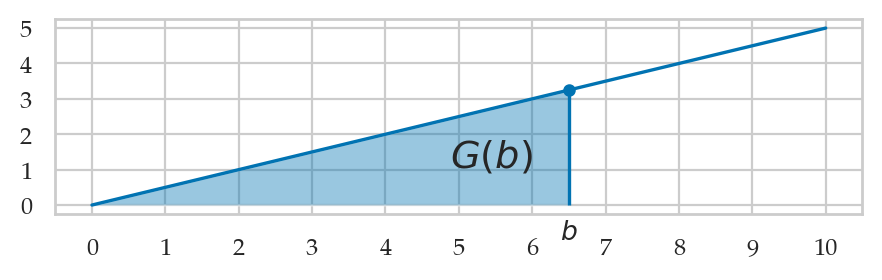

In [8]:
ax = sns.lineplot(x=xs, y=gs)

# variable upper limit of integration
b = 6.5

# highlight the area under g(x) form x=0 until x=b
mask = (xs > 0) & (xs < b)
ax.fill_between(xs[mask], y1=gs[mask], alpha=0.4)
ax.set_xticks(range(0,11))
ax.set_yticks(range(0,6))
ax.vlines([b], ymin=0, ymax=g(b))
ax.text(b, -0.4, "$b$", ha="center", va="top")
ax.text(3*b/4, g(b)/3, "$G(b)$", fontsize="x-large")
ax.plot([b], [g(b)], ".C0", markersize=7)

# FIGURES ONLY
filename = os.path.join(DESTDIR, "calculus_integral_function_Gx_until_b.pdf")
savefigure(ax, filename)


## Computer models for random variables

Saved figure to figures/prob/continuous/continuous-prob-example-rvU.pdf
Saved figure to figures/prob/continuous/continuous-prob-example-rvU.png


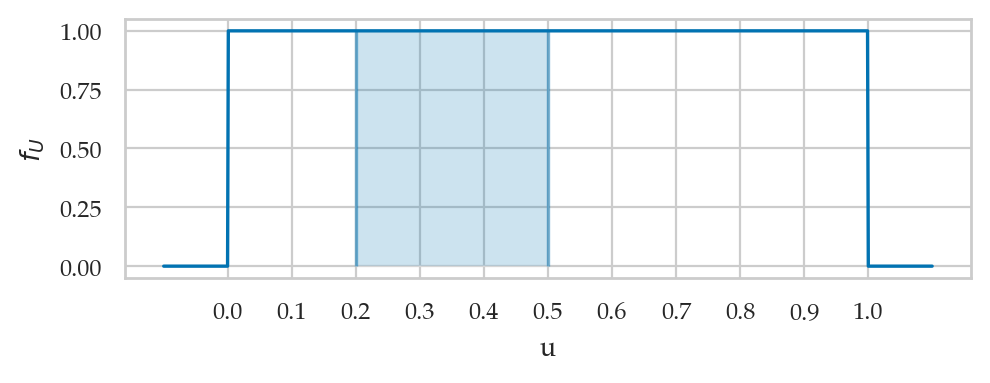

In [9]:
# FIGURES ONLY
from ministats import plot_pdf
from scipy.stats import uniform

rvU = uniform(0, 1)

with plt.rc_context({"figure.figsize":(5,2)}):
    ax = plot_pdf(rvU, xlims=[-0.1, 1.1], rv_name="U", a=0.2, b=0.5)
    ax.set_xticks(np.arange(0,1.1,0.1))
    filename = os.path.join(DESTDIR, "continuous-prob-example-rvU.pdf")
    savefigure(ax, filename)

Saved figure to figures/prob/continuous/continuous-prob-example-rvZ.pdf
Saved figure to figures/prob/continuous/continuous-prob-example-rvZ.png


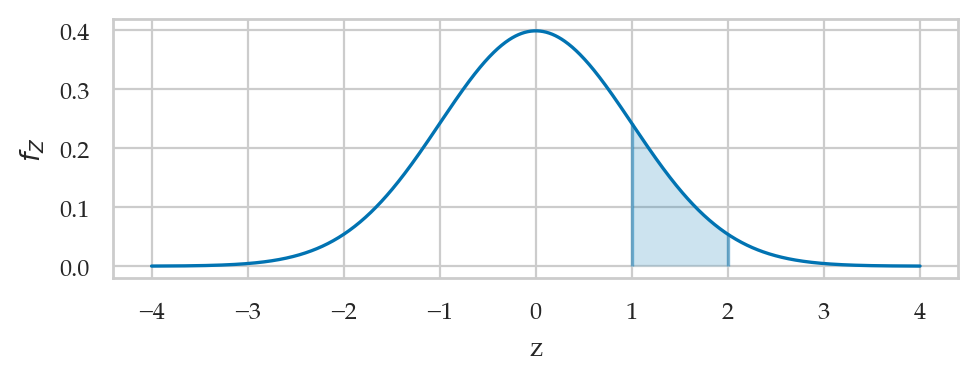

In [10]:
# FIGURES ONLY
from scipy.stats import norm
from ministats import plot_pdf

rvZ = norm(0, 1)

with plt.rc_context({"figure.figsize":(5,2)}):
    ax = plot_pdf(rvZ, xlims=[-4,4], rv_name="Z", a=1, b=2)
    filename = os.path.join(DESTDIR, "continuous-prob-example-rvZ.pdf")
    savefigure(ax, filename)

## Cumulative distribution functions

#### Example 1: Uniform distribution



In [11]:
# define the computer model `rvU` for the random variable U
from scipy.stats import uniform
rvU = uniform(0, 1)

Saved figure to figures/prob/continuous/uniform_pdf_and_CDF_until_b.pdf
Saved figure to figures/prob/continuous/uniform_pdf_and_CDF_until_b.png


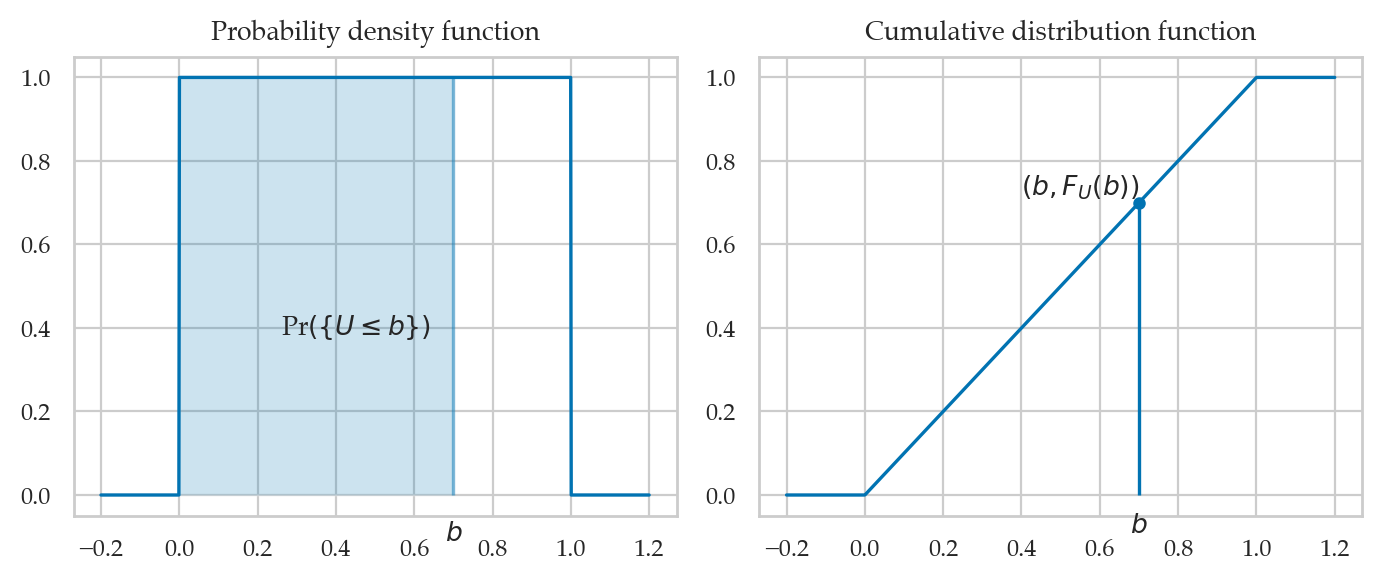

In [12]:
with plt.rc_context({"figure.figsize":(7,3)}):
    fig, axs = plot_pdf_and_cdf(rvU, b=0.7, xlims=[-0.2,1.2], rv_name="U", title=None)
    filename = os.path.join(DESTDIR, "uniform_pdf_and_CDF_until_b.pdf")
    savefigure(fig, filename)

#### Example 2: Normal distribution


Saved figure to figures/prob/continuous/normal_pdf_and_CDF_until_b.pdf
Saved figure to figures/prob/continuous/normal_pdf_and_CDF_until_b.png


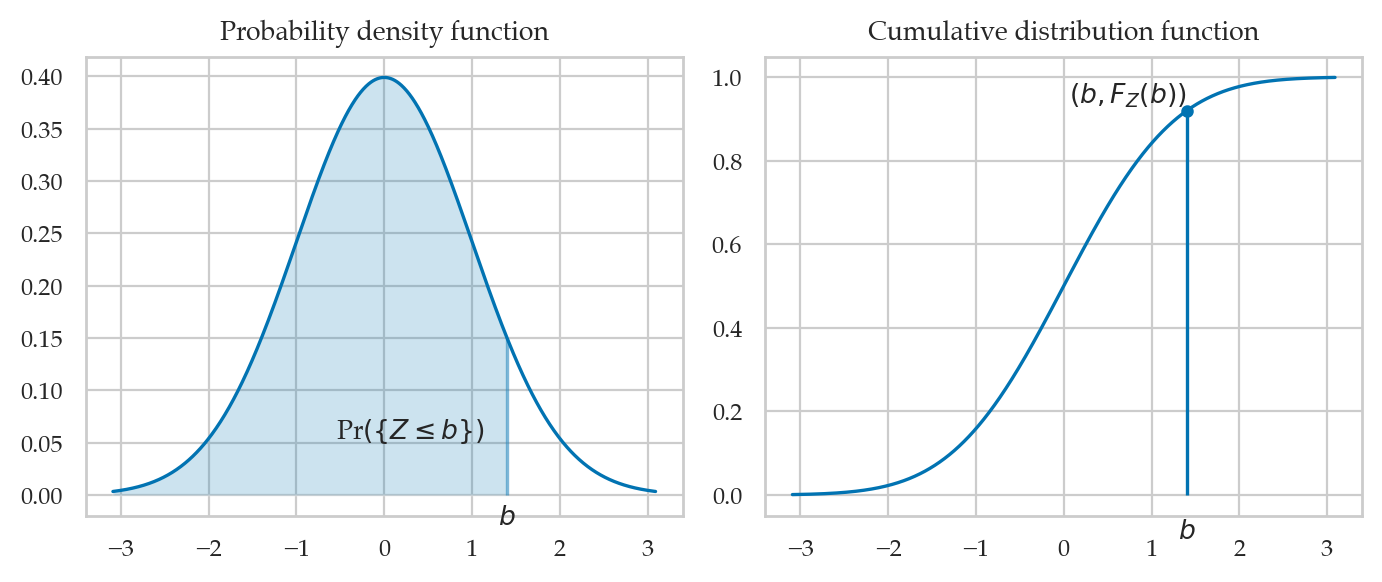

In [13]:
# define the computer model `rvK` for the random variable K
from scipy.stats import norm
rvZ = norm(0, 1)

with plt.rc_context({"figure.figsize":(7,3)}):
    fig, axs = plot_pdf_and_cdf(rvZ, b=1.4, rv_name="Z", title=None)
    filename = os.path.join(DESTDIR, "normal_pdf_and_CDF_until_b.pdf")
    savefigure(fig, filename)

The code example below shows the calculation of the probability $\Pr\!\left( \{ 980 \leq K \leq 990 \} \right)$,
which corresponds to the integral $\int_{k=980}^{k=990} f_K(k) dk$.

## Calculating expectations

### Example 1: mean and variance of the uniform distribution


### Example 2: mean and variance of a normal distribution

<a name="computer_models"></a>

## Kombucha volume example


In [14]:
from scipy.stats import norm

# create a normal random variable with mean 1000 and std 10
rvK = norm(1000, 10)

In [15]:
type(rvK)

scipy.stats._distn_infrastructure.rv_continuous_frozen

In [16]:
## see all attributes and methods:
# [attr for attr in dir(rvK) if "__" not in attr] 

### Plotting the probability functions

Saved figure to figures/prob/continuous/plot_of_pdf_of_rvK.pdf
Saved figure to figures/prob/continuous/plot_of_pdf_of_rvK.png


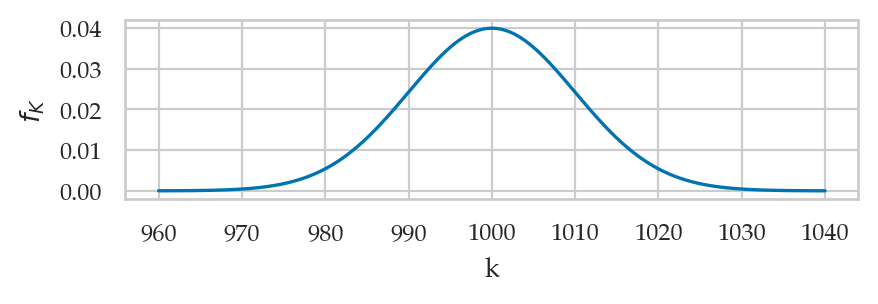

In [39]:
import matplotlib.pyplot as plt


with plt.rc_context({"figure.figsize":(4.5,1.6)}):
    ax = plot_pdf(rvK, xlims=[960,1040], rv_name="K")
    ax.set_yticks([0,0.01,0.02,0.03,0.04])
    filename = os.path.join(DESTDIR, "plot_of_pdf_of_rvK.pdf")
    savefigure(ax, filename)

The cumulative distribution is the integral of the probability density function:

$$
   F_K(b) = \textrm{Pr}(\{K \leq b\}) = \int_{-\infty}^b f_K(k) \, dk.
$$

Saved figure to figures/prob/continuous/plot_of_CDF_of_rvK.pdf
Saved figure to figures/prob/continuous/plot_of_CDF_of_rvK.png


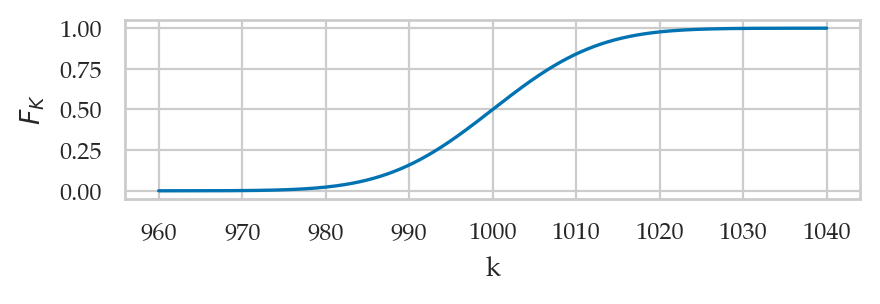

In [41]:
from ministats import plot_cdf

with plt.rc_context({"figure.figsize":(4.5,1.6)}):
    ax = plot_cdf(rvK, xlims=[960,1040], rv_name="K")
    ax.set_yticks([0,0.25,0.5,0.75,1.0])
    filename = os.path.join(DESTDIR, "plot_of_CDF_of_rvK.pdf")
    savefigure(ax, filename)

Saved figure to figures/prob/continuous/plot_of_invCDF_of_rvK.pdf
Saved figure to figures/prob/continuous/plot_of_invCDF_of_rvK.png


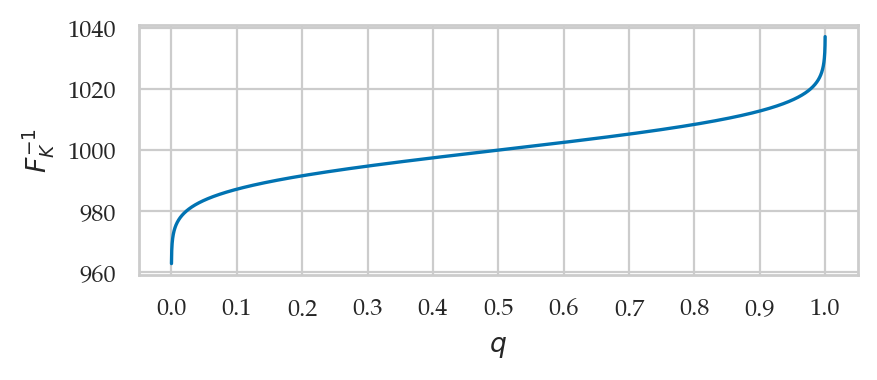

In [52]:
with plt.rc_context({"figure.figsize":(4.5,2)}):
    qs = np.linspace(0, 1, 10000)
    invFqs = rvK.ppf(qs)
    ax = sns.lineplot(x=qs, y=invFqs)
    ax.set_xlabel("$q$")
    ax.set_xticks(np.linspace(0,1,11))
    ax.set_ylabel("$F_K^{-1}$")
    ax.set_yticks(np.linspace(960,1040,5))
    filename = os.path.join(DESTDIR, "plot_of_invCDF_of_rvK.pdf")
    savefigure(ax, filename)

### Computing expectations

Suppose the distributor accepts only bottles contain between 800 ml and 1200 ml,
and you'll receive a receive payment of $\$2$ for each bottle.
Bottles outside that range get rejected and you don't get paid for them.

In [19]:
def payment(k):
    if 980 <= k and k <= 1020:
        return 2
    else:
        return 0

In [20]:
# get paid if in spec
payment(1005)

2

In [21]:
# don't get paid if out of spec
payment(1025)

0

In [22]:
# expected value of payment
rvK.expect(payment, lb=0, ub=2000)

1.9089994711961735

Visually speaking, only parts of the probability mass of the random variable "count" towards the payment, the subset of the values inside the yellow region shown below.

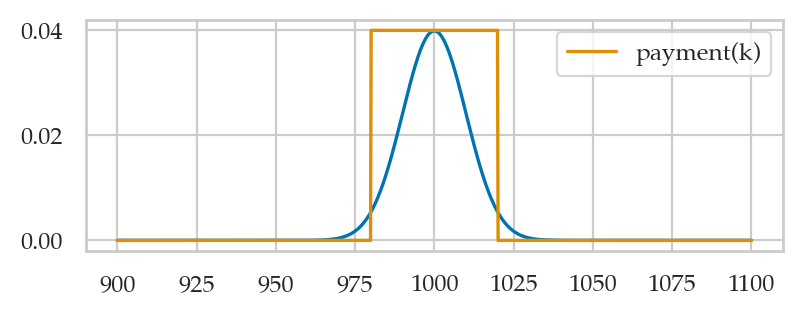

In [23]:
ks = np.linspace(900, 1100, 1000)
payments = [payment(k)/50 for k in ks]

sns.lineplot(x=ks, y=rvK.pdf(ks))
sns.lineplot(x=ks, y=payments, label="payment(k)");

## Multiple random variables

### Joint probability density functions

In [24]:
from scipy.stats import multivariate_normal

# parameters
mu = [10, 5]
Sigma = [[  3**2,     0.75*3*1],
         [  0.75*3*1,     1**2]]


# multivariate normal
rvXY = multivariate_normal(mu, Sigma)

Saved figure to figures/prob/continuous/joint_prob_density_fXY.pdf
Saved figure to figures/prob/continuous/joint_prob_density_fXY.png


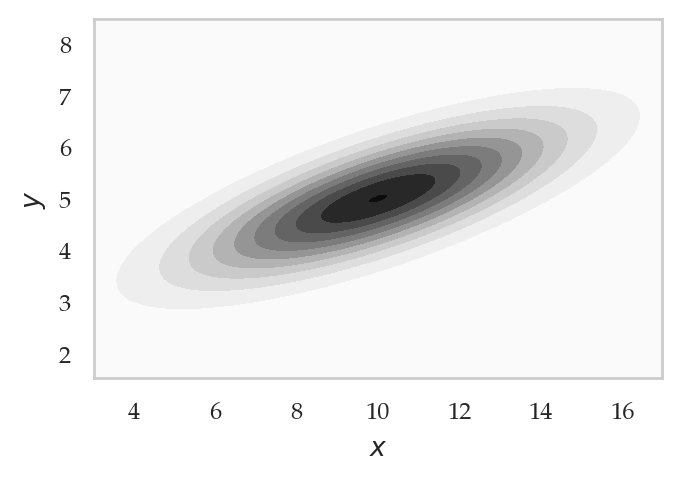

In [25]:
xmin = 3
xmax = 17
ymin = 1.5
ymax = 8.5

from ministats import plot_joint_pdf_contourf

fig, ax = plt.subplots(figsize=(3.5,2.5))
plot_joint_pdf_contourf(rvXY, xlims=[xmin,xmax], ylims=[ymin,ymax], ax=ax)
filename = os.path.join(DESTDIR, "joint_prob_density_fXY.pdf")
savefigure(ax, filename)

Saved figure to figures/prob/continuous/joint_prob_density_fXY_in_3D.pdf
Saved figure to figures/prob/continuous/joint_prob_density_fXY_in_3D.png


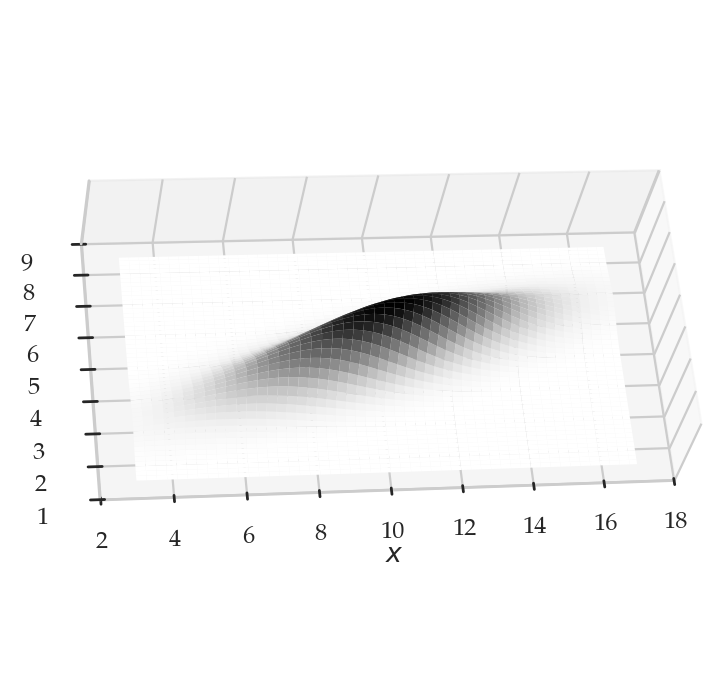

In [26]:
from ministats import plot_joint_pdf_surface

fig = plt.figure(figsize=(3.5,3.5))
viewdict = dict(elev=60., azim=-110, roll=-16)
ax = plot_joint_pdf_surface(rvXY, xlims=[xmin,xmax], ylims=[ymin,ymax], fig=fig, viewdict=viewdict);

filename = os.path.join(DESTDIR, "joint_prob_density_fXY_in_3D.pdf")
savefigure(ax, filename)

### Marginal density functions

Saved figure to figures/prob/continuous/joint_prob_density_fXY_with_marginals.pdf
Saved figure to figures/prob/continuous/joint_prob_density_fXY_with_marginals.png


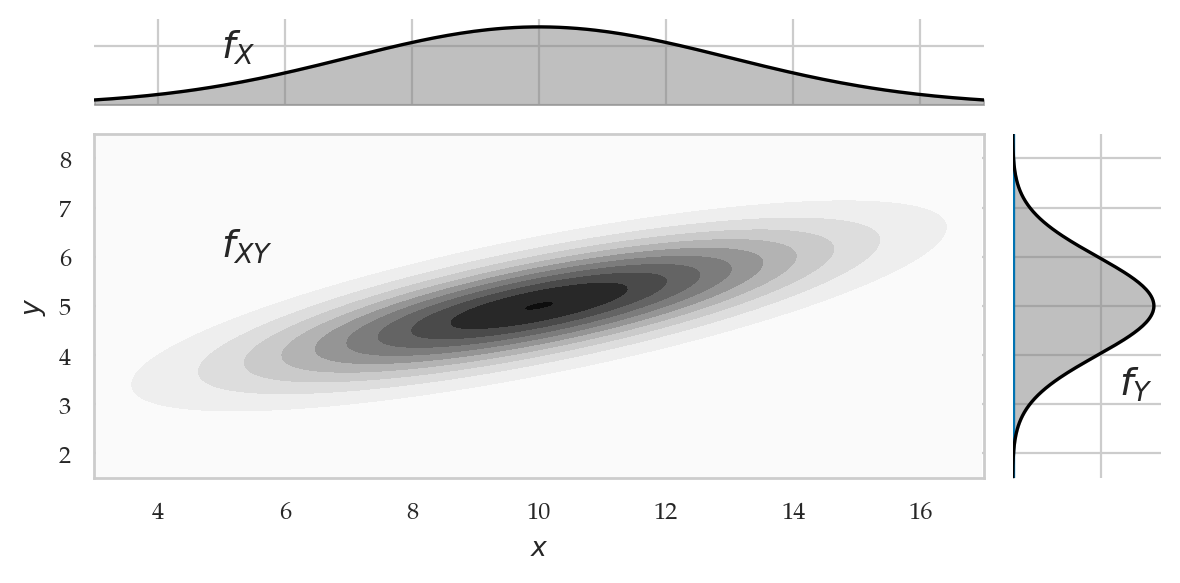

In [27]:
from ministats.book.figures import plot_joint_pdf_and_marginals

fig = plt.figure(figsize=(6,3))
plot_joint_pdf_and_marginals(rvXY, xlims=[xmin,xmax], ylims=[ymin,ymax], fig=fig)
filename = os.path.join(DESTDIR, "joint_prob_density_fXY_with_marginals.pdf")
savefigure(fig, filename)

### Conditional probability density functions

Saved figure to figures/prob/continuous/slices_from_fXY.pdf
Saved figure to figures/prob/continuous/slices_from_fXY.png


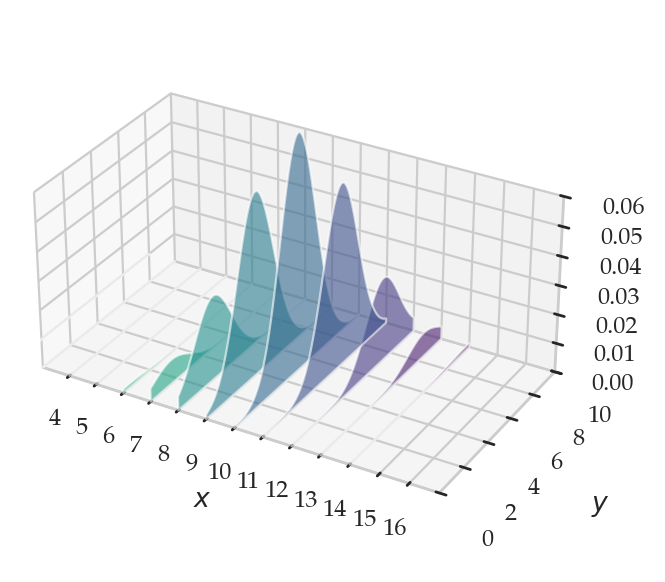

In [28]:
from ministats.book.figures import plot_slices_through_joint_pdf

fig = plt.figure(figsize=(6,3))
xcuts = range(2, 15, 1)
plot_slices_through_joint_pdf(rvXY, xlims=[3,17], ylims=[0,10], xcuts=xcuts, fig=fig);

filename = os.path.join(DESTDIR, "slices_from_fXY.pdf")
savefigure(fig, filename)

Saved figure to figures/prob/continuous/conditional_distributions_fYgivenX.pdf
Saved figure to figures/prob/continuous/conditional_distributions_fYgivenX.png


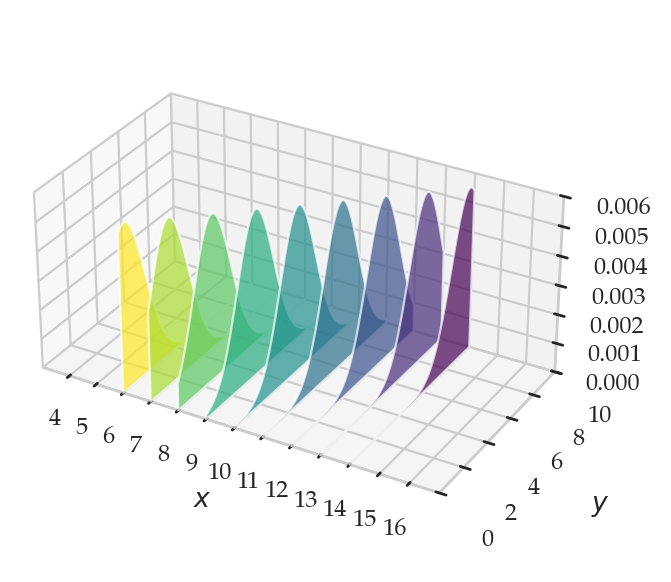

In [29]:
from ministats.book.figures import plot_conditional_fYgivenX

fig = plt.figure(figsize=(6,3))
xcuts = range(6, 15, 1)
plot_conditional_fYgivenX(rvXY, xlims=[3,17], ylims=[0,10], xcuts=xcuts, fig=fig);

filename = os.path.join(DESTDIR, "conditional_distributions_fYgivenX.pdf")
savefigure(fig, filename)

### Examples

#### Example ?: Multivariate normal

In [30]:
# TODO

### Useful probability formulas

### Multivariable expectation
                                

### Independent, identically distributed random variabls

## Discussion

### Bulk of the normal distribution

How much of the total probability "weight" lies within $n$ standard deviations of the mean?

$$
\textrm{Pr}(\mu_K - n\sigma_K \leq K \leq \mu_K + n\sigma_K) \ = \ p_n.
$$

In [31]:
from scipy.stats import norm
rvK = norm(1000, 10)

In [32]:
from scipy.integrate import quad

muK = rvK.mean()    # mean of the random variable rvK
sigmaK = rvK.std()  # standard deviation of rvK

for n in [1, 2, 3]:
    I_n = [muK - n*sigmaK, muK + n*sigmaK]
    p_n = quad(rvK.pdf, I_n[0], I_n[1])[0]
    print(f"p_{n} = Pr({{K in {I_n}}}) = {p_n:.3f}")

p_1 = Pr({K in [990.0, 1010.0]}) = 0.683
p_2 = Pr({K in [980.0, 1020.0]}) = 0.954
p_3 = Pr({K in [970.0, 1030.0]}) = 0.997


The code below highlights the interval $I_n$ and computes the probability $p_n$.
Change the value of the variable `n` to get different plots.

Saved figure to figures/prob/continuous/bulk_of_the_distribution_panel.pdf
Saved figure to figures/prob/continuous/bulk_of_the_distribution_panel.png


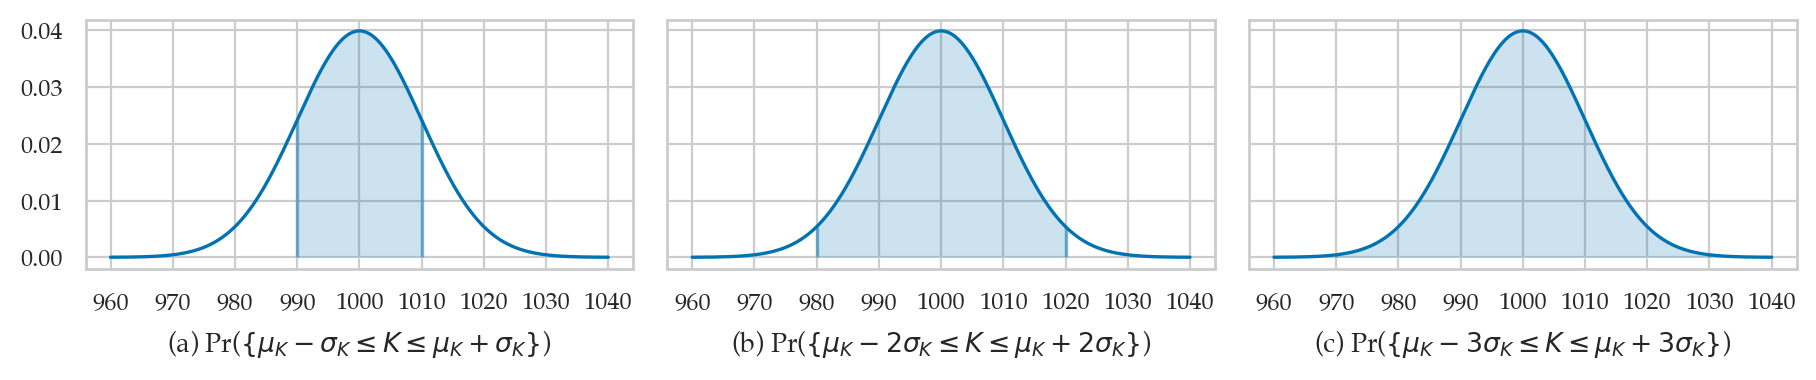

In [33]:
from ministats.book.figures import bulk_of_pdf_panel

xticks = range(960,1040+1,10)
fig = bulk_of_pdf_panel(rvK, rv_name="K", xlims=[960, 1040], xticks=xticks)

filename = os.path.join(DESTDIR, "bulk_of_the_distribution_panel.pdf")
savefigure(fig, filename)

### Tails of the normal distribution

We're often interested in tail ends of the distribution, which contain the unlikely events.

In [54]:
muK = rvK.mean()    # mean of the random variable rvK
sigmaK = rvK.std()  # standard deviation of rvK

for n in [1, 2, 3]:
    # compute the probability in the left tail (-∞,𝜇-n𝜎]
    x_l = muK - n*sigmaK
    p_l = quad(rvK.pdf, -np.inf, x_l)[0]
    # compute the probability in the right tail [𝜇+n𝜎,∞)
    x_r = muK + n*sigmaK
    p_r = quad(rvK.pdf, x_r, np.inf)[0]
    # add together to get total probability in the tails
    p_tails = p_l + p_r
    print(f"Pr({{K<{x_l:.0f} or K>{x_r:.0f}}}) = {p_tails:.4f}")

Pr({K<990 or K>1010}) = 0.3173
Pr({K<980 or K>1020}) = 0.0455
Pr({K<970 or K>1030}) = 0.0027


The code below highlights the tails of the distribution.

Saved figure to figures/prob/continuous/tails_of_the_distribution_panel.pdf
Saved figure to figures/prob/continuous/tails_of_the_distribution_panel.png


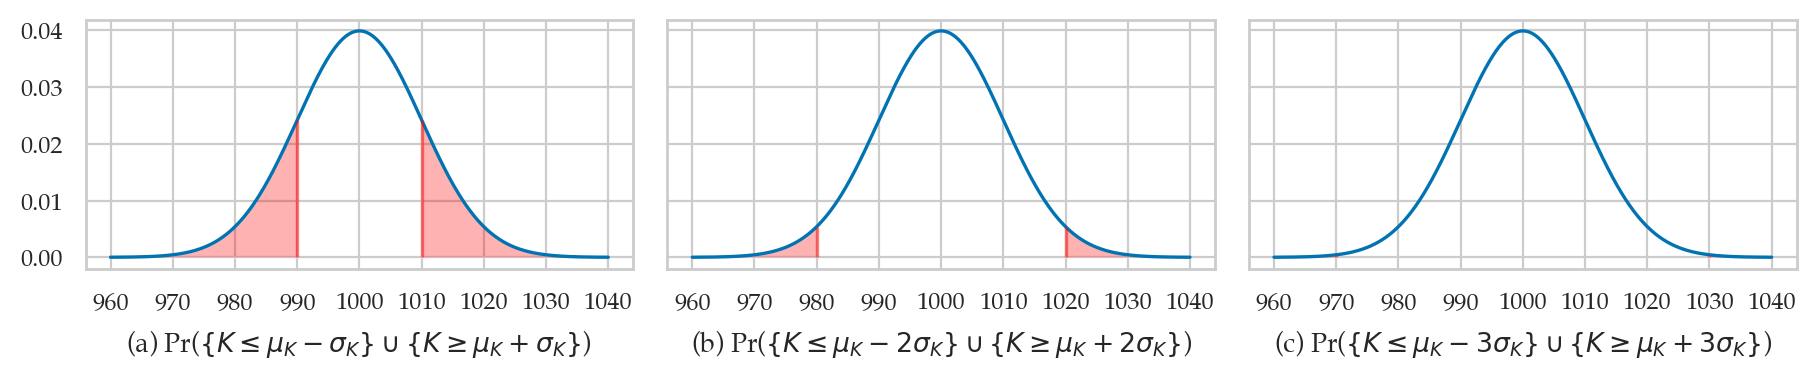

In [35]:
from ministats.book.figures import tails_of_pdf_panel

xticks = range(960,1040+1,10)
fig = tails_of_pdf_panel(rvK, rv_name="K", xlims=[960, 1040], xticks=xticks)

filename = os.path.join(DESTDIR, "tails_of_the_distribution_panel.pdf")
savefigure(fig, filename)

The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are $n=2$ standard deviations away from the mean (more precisely,
we should use $n=1.96$ to get exactly 5%).
We'll use this facts later in STATS to define a *cutoff value* for events that are unlikely to occur by chance.